In [7]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
from pathlib import Path
import warnings
import os
import random
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from tqdm.notebook import tqdm
from sklearn.metrics import mean_squared_error

warnings.simplefilter('ignore')

# データ読み込み

In [3]:
train_orig = pd.read_pickle("/content/drive/MyDrive/Kaggle/BlueCarbon/proc/train.pkl")
train = pd.read_pickle("/content/drive/MyDrive/Kaggle/BlueCarbon/proc/Val_20230429/train_predicted_val8-0.pkl")
train.shape

(14140, 433)

# 可視化

## 年月ごとの予測精度

In [4]:
train_date = train_orig[["year", "month"]]

def convert_int_into_str(x):
    x_str = str(int(x))
    if len(x_str)==1:
        return "0" + x_str
    return x_str

train_date["month_str"] = train_date["month"].apply(convert_int_into_str)
train_date["date"] = (train_date["year"].astype(int).astype(str) + train_date["month_str"]).astype(int)

train["date"] = train_date["date"]

In [14]:
train_pred = train[["cover", "y_pred", "date"]].sort_values(by="date")
df_score = pd.DataFrame(columns=["score"])
for date in train_pred["date"].unique():
    tmp = train_pred[train_pred["date"]==date]
    score = np.sqrt(mean_squared_error(tmp["cover"].values, tmp["y_pred"].values))
    df_score.loc[date, "score"] = score

df_score.reset_index(inplace=True)
df_score.columns=["date", "score"]
df_score["date"] = df_score["date"].astype(str)
df_score.head()

,date,score
0,199911,0.10395
1,200002,0.198754
2,200003,0.07027
3,200004,0.159736
4,200112,0.370948


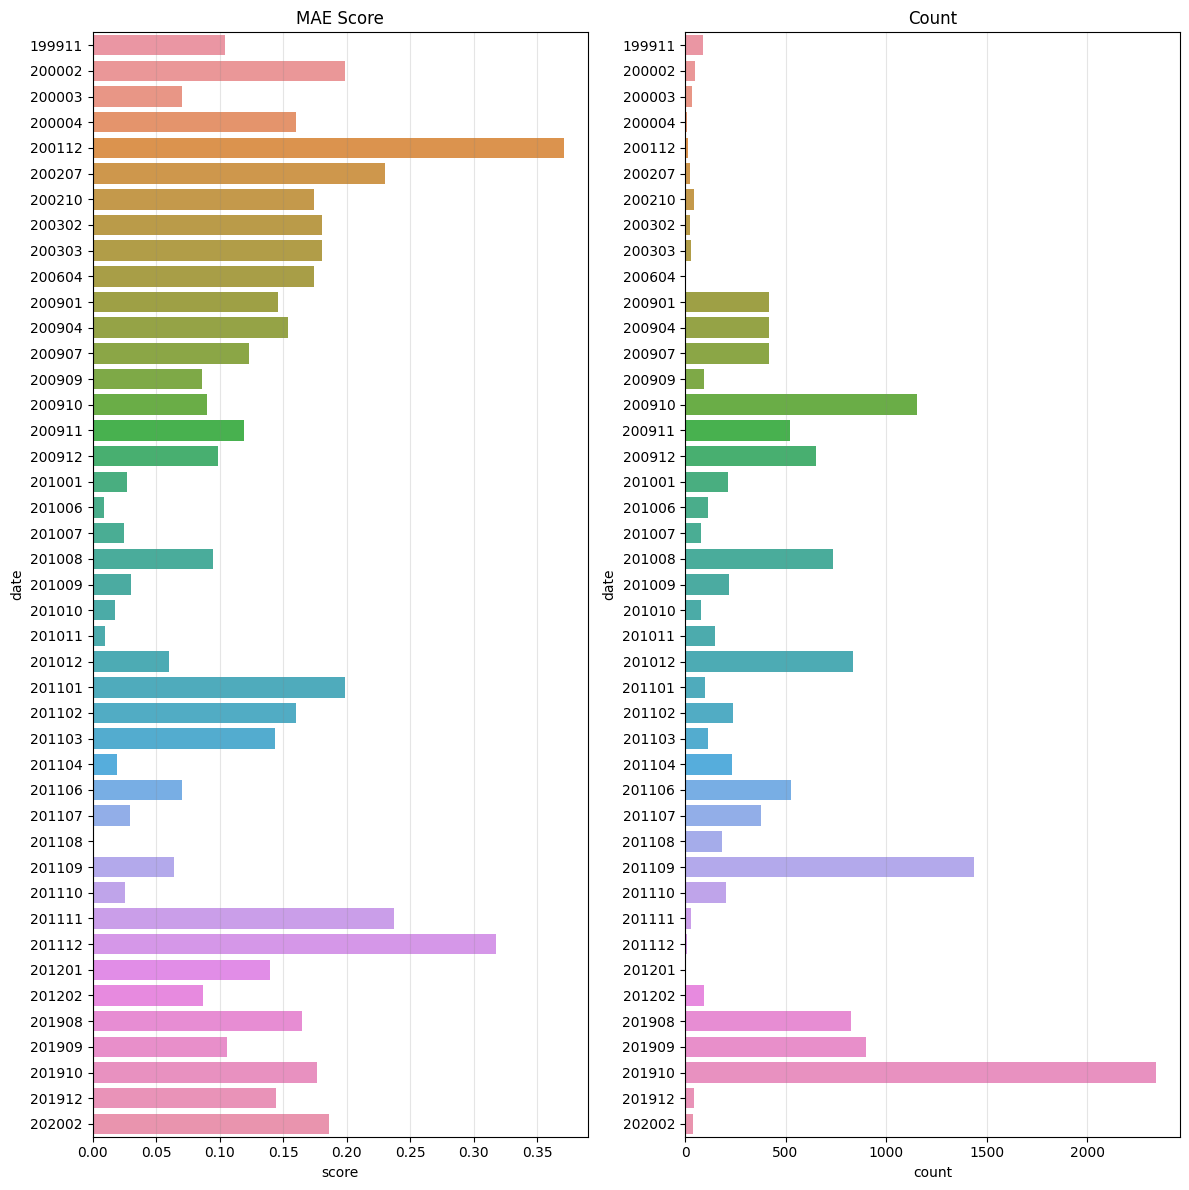

In [19]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(121)
ax1.grid(color="gray", alpha=0.2)
ax1.set_title("MAE Score")
sns.barplot(x="score", y="date", data=df_score, ax=ax1)
ax2 = fig.add_subplot(122)
ax2.grid(color="gray", alpha=0.2)
ax2.set_title("Count")
sns.countplot(y="date", data=train_pred, ax=ax2)
plt.tight_layout()
plt.show()

## ランドサットのデータ欠損時期

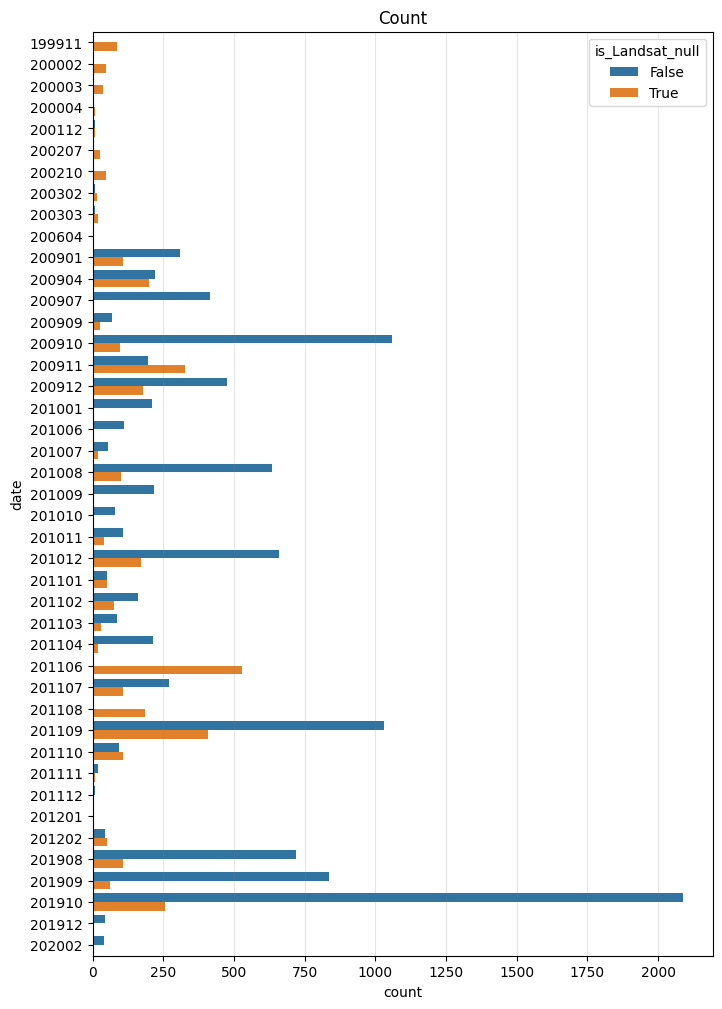

In [20]:
train_pred["is_Landsat_null"] = train["Blue"].isnull()
fig = plt.figure(figsize=(8, 12))
ax2 = fig.add_subplot()
ax2.grid(color="gray", alpha=0.2)
ax2.set_title("Count")
sns.countplot(y="date", data=train_pred, hue="is_Landsat_null", ax=ax2)
# plt.tight_layout()
plt.show()

In [22]:
print(train_pred.loc[train_pred["is_Landsat_null"], "cover"].mean())
print(train_pred.loc[~train_pred["is_Landsat_null"], "cover"].mean())

0.15094443
0.19412051
